**Homework 9 Template**

Make a copy of this and save as "hw9_name.ipynb"

Name: Jamison Wolsborn

Comments for instructor:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 9.4**

A classic example of a diffusion problem with a time-varying boundary condition is the diffusion of heat into the crust of the Earth, as surface temperature varies with the seasons.  Suppose the mean daily temperature at a particular point on the surface varies as:

\begin{equation*}
T_0(t) = A + B\sin {2\pi t\over\tau},
\end{equation*}

where $\tau=365\,$days, $A=10^\circ$C and $B=12^\circ$C.  At a depth of $20\,$m below the surface almost all annual temperature variation is ironed out and the temperature is, to a good approximation, a constant $11^\circ$C
(which is higher than the mean surface temperature of $10^\circ$C---temperature increases with depth, due to heating from the hot core of the planet).  The thermal diffusivity of the Earth's crust varies somewhat from place to place, but for our purposes we will treat it as constant with value $D=0.1\,\mathrm{m}^2\,\mathrm{day}^{-1}$.

Write a program, or modify one of the ones given in this chapter, to calculate the temperature profile of the crust as a function of depth up to $20\,$m and time up to 10 years.  Start with temperature everywhere equal to $10^\circ$C, except at the surface and the deepest point, choose values for the number of grid points and the time-step $h$, then run your program
for the first nine simulated years, to allow it to settle down into whatever pattern it reaches.  Then for the tenth and final year plot four temperature profiles taken at 3-month intervals on a single graph to illustrate how the temperature changes as a function of depth and time.

(0.0, 20.0)

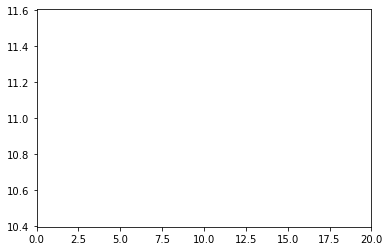

In [16]:
rho = 365.25 #days with leapyears
A = 10 #celcius
B = 12 #celcius
C = 11 #Deepest point temp
D = 0.1 #meter^2 day^-1

def Temp(t):
    A + B*np.sin(2*np.pi*t/rho)

L = 20 #Meters deep
N = 100
a = L/N
h = 1e-3
epsilon = h/1000

t1 = rho*9
t2 = t1 + rho/3
t3 = t2 + rho/3
t4 = t3 + rho/3
t5 = t4 + rho/3
tend = t5 + epsilon

T = np.zeros([N+1],float)
T[0] = B
T[N] = C
T[1:N] = A
Tp = np.empty([N+1],float)
Tp[0] = 12
Tp[N] = 10

t = 0.0
c = h*D/(a*a)
while t<tend:
    T[0] = Temp(t)
    Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T,Tp = Tp,T
    t += h
    
    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,'b')
    elif abs(t-t2)<epsilon:
        plt.plot(T)
    elif abs(t-t3)<epsilon:
        plt.plot(T)
    elif abs(t-t4)<epsilon:
        plt.plot(T)
    elif abs(t-t5)<epsilon:
        plt.plot(T)
        
plt.xlim(0,20)

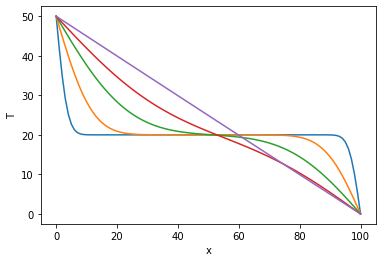

In [2]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 10.0     # Low temperature in Celcius
Tmid = 11.0   # Intermediate temperature in Celcius
Thi = 12.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)

xlabel("x")
ylabel("T")
show()

0.20000000000000004
h =  0.0365


<ipython-input-15-e4dc6dfe94da>:32: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  temp = zeros([N + 1], float)
<ipython-input-15-e4dc6dfe94da>:35: DeprecationWarning: scipy.empty is deprecated and will be removed in SciPy 2.0.0, use numpy.empty instead
  temp_1 = empty([N + 1], float)
<ipython-input-15-e4dc6dfe94da>:28: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return 10 + 12 * sin(2 * pi * t / 365)
<ipython-input-15-e4dc6dfe94da>:28: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return 10 + 12 * sin(2 * pi * t / 365)
<ipython-input-15-e4dc6dfe94da>:28: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return 10 + 12 * sin(2 * pi * t / 365)
<ipython-input-15-e4dc6dfe94da>:28: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0,

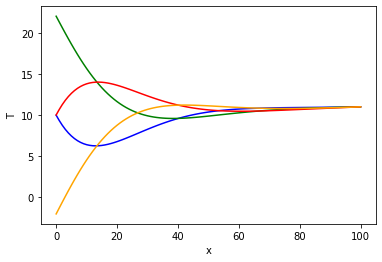

In [15]:
from scipy import zeros, sin, pi, empty, arange
from pylab import plot, show, xlabel, ylabel

# Constants
# Note need to ensure h < a^2 / 2 * D to ensure numerical stability
D = 0.1  # diffusion constant in m^2 / day
x_0 = 0
x_f = 20  # final depth in m
t_0 = 0
t_f = 10 * 365  # 10 years in days
N = 100  # number of spatial grid points
a = x_f / N
h = (t_f - t_0) / 100000  # time step size in days
c = h * D / (a) ** 2
epsilon = h / 10000


print(a ** 2 / (2 * D))
print('h = ', h)

t1 = 3285  # 9 years in days
t2 = 3376.25
t3 = 3467.5
t4 = 3558.75


def T(t):
    return 10 + 12 * sin(2 * pi * t / 365)


# Create arrays
temp = zeros([N + 1], float)
temp = temp + 10
temp[N] = 11  # Celsius
temp_1 = empty([N + 1], float)
temp_1[0] = T(0)
temp_1[N] = 11

# Loop
t = t_0
while t < t_f:
    temp[0] = T(t)
    temp_1[1: N] = temp[1: N] + c * (temp[0: N - 1] + temp[2: N + 1] - 2 * temp[1: N])
    temp, temp_1 = temp_1, temp
    t += h

    # Make plots at desired times
    if abs(t - t1) < epsilon:
        plot(temp, 'b')
    elif abs(t - t2) < epsilon:
        plot(temp, 'g')
    elif abs(t - t3) < epsilon:
        plot(temp, 'r')
    elif abs(t - t4) < epsilon:
        plot(temp, color='orange')

xlabel("x")
ylabel("T")
show()

**Total Exercise Pts /10**

**Exercise 9.5**

Consider a piano string of length $L$, initially at rest.  At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of the string. Check your textbook for a diagram.

The string vibrates as a result of being struck, except at the ends, $x=0$ and $x=L$, where it is held fixed.

**a)**
Write a program that uses the FTCS method to solve the complete set of simultaneous first-order equations, Eq. (9.28), for the case $v=100\,\mathrm{ms}^{-1}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile

\begin{equation*}
\psi(x) = C {x(L-x)\over L^2} \exp \biggl[ -{(x-d)^2\over2\sigma^2} \biggr],
\end{equation*}

where $L=1\,$m, $d=10\,$cm, $C=1\,\mathrm{ms}^{-1}$, and $\sigma=0.3\,$m. You will also need to choose a value for the time-step~$h$.  A reasonable choice is $h=10^{-6}\,$s.

In [2]:
#Type your code here

**Pts /10**

**b)** 
Make an animation of the motion of the piano string using the facilities provided by the *vpython* package, which we studied in Section 3.4.  There are various ways you could do this.  A simple one would be to just place a small sphere at the location of each grid point on the string.  A more sophisticated approach would be to use the _curve_ object in the *vpython* package---see the on-line documentation at _www.vpython.org_ for details.  A convenient feature of the curve object is that you can specify its set of $x$ positions and $y$ positions separately as arrays.  In this exercise the
  $x$ positions only need to specified once, since they never change, while the $y$ positions will need to be specified anew each time you take a time-step.  Also, since the vertical displacement of the string is much less than its horizontal length, you will probably need to multiply the vertical displacement by a fairly large factor to make it visible on the
  screen.

  Allow your animation to run for some time, until numerical instabilities
  start to appear.

In [3]:
#Type your code here

**Pts /5**

**Total Exercise Pts /15**

**Exercise 9.9**

This exercise uses the spectral method to solve the time-dependent Schrodinger equation

\begin{equation*}
-{\hbar^2\over2M} {\partial^2\psi\over\partial x^2}
  = i\hbar {\partial\psi\over\partial t}
\end{equation*}

for the same system as in Exercise 9.8, a single particle in one dimension in a box of length $L$ with impenetrable walls.  The wavefunction in such a box necessarily goes to zero on the walls and hence one possible (unnormalized) solution of the equation is

\begin{equation*}
\psi_k(x,t) = \sin \biggl( {\pi k x\over L} \biggr)\,e^{i Et/\hbar},
\end{equation*}

where the energy $E$ can be found by substituting into the Schrodinger equation, giving

\begin{equation*}
E = {\pi^2\hbar^2k^2\over2ML^2}.
\end{equation*}

As with the vibrating string of Section 9.3.4, we can write a full solution
as a linear combination of such individual solutions, which on the grid
points $x_n=nL/N$ takes the value

\begin{equation*}
\psi(x_n,t) = {1\over N}
              \sum_{k=1}^{N-1} b_k \sin \biggl( {\pi k n\over N} \biggr)\>
              \exp \biggl( i{\pi^2\hbar k^2\over2ML^2} t \biggr),
\end{equation*}

where the $b_k$ are some set of (possibly complex) coefficients that
specify the exact shape of the wavefunction and the leading factor of $1/N$
is optional but convenient.

Since the Schrodinger equation (unlike the wave equation) is first order
in time, we need only a single initial condition on the value
of $\psi(x,t)$ to specify the coefficients $b_k$, although, since the
coefficients are in general complex, we will need to calculate both real
and imaginary parts of each coefficient.

As in Exercise 9.8 we consider an electron (mass $M=9.109\times10^{-31}\,$kg) in a box of length~$L=10^{-8}\,$m.  At time
$t=0$ the wavefunction of the electron has the form 

\begin{equation*}
\psi(x,0) = \exp \biggl[ -{(x-x_0)^2\over2\sigma^2} \biggr]
            e^{i\kappa x},
\end{equation*}

where

\begin{equation*}
x_0 = {L\over2},\qquad
\sigma = 1\times10^{-10}\,\mathrm{m},\qquad
\kappa = 5\times10^{10}\,\mathrm{m}^{-1},
\end{equation*}

and $\psi=0$ on the walls at $x=0$ and $x=L$.

**a)** 
Write a program to calculate the values of the coefficients $b_k$, which for convenience can be broken down into their real and imaginary parts as $b_k=\alpha_k+ i\eta_k$.  Divide the box into $N=1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point.  Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1\ldots N-1$.

To perform the discrete sine transforms, you can use the fast transform function _dst_ from the package _dcst_, which you can find in the on-line resources in the file named _dcst.py_.  A copy of the code for the package can also be found in Appendix E.  The function takes an array of $N$ real numbers and returns the discrete sine transform as another array of $N$ numbers.

(Note that the first element of the input array should in principle always be zero for a sine transform, but if it is not the _dst_ function will simply pretend that it is.  Similarly the first element of the returned array is always zero, since the $k=0$ coefficient of a sine transform is always zero.  So in effect, the sine transform really only takes $N-1$ real numbers and transforms them into another $N-1$ real numbers.  In some implementations of the discrete sine transform, therefore, though not the one in the package _dsct_ used here, the first element of each array is simply omitted, since it's always zero anyway, and the arrays are only $N-1$ elements long.)

In [4]:
#Type your code here

**Pts /5**

**b)** 
Putting $b_k=\alpha_k+ i\eta_k$ in the solution above and taking the real part we get

\begin{equation*}
\Re \psi(x_n,t) = {1\over N} \sum_{k=1}^{N-1}
            \biggl[ \alpha_k \cos \biggl( {\pi^2\hbar k^2\over2ML^2} t \biggr)
            - \eta_k \sin \biggl( {\pi^2\hbar k^2\over2ML^2} t \biggr) \biggr]
            \sin \biggl( {\pi k n\over N} \biggr)
\end{equation*}

for the real part of the wavefunction.  This is an inverse sine transform with coefficients equal to the quantities in the square brackets. Extend your program to calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function _idst_, also from the package _dcst_.  Test your program by making a graph of the wavefunction at time $t=10^{-16}\,$s.

In [3]:
#Type your code here

**Pts /5**

**c)**
Extend your program further to make an animation of the wavefunction over time, similar to that described in part (b) of Exercise 9.8 above. A suitable time interval for each frame of the animation is about $10^{-18}\,$s.

In [3]:
#Type your code here

**Pts /5**

**d)**
Run your animation for a while and describe what you see.  Write a few sentences explaining in physics terms what is going on in the system.

In [5]:
#Type your code here

**Pts /5**

**Total Exercise Pts /20**

**Exercise 10.2**

This exercise looks at a more advanced version of the simple radioactive decay simulation in Example 10.1. The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and half-lives (check your textbook for a figure of this). (Technically, $^{209}$Bi isn't really stable, but it has a half-life of more than $10^{19}$ years, a billion times the age of the universe, so it might as well be.)

Starting with a sample consisting of $10\,000$ atoms of $^{213}$Bi, simulate the decay of the atoms as in Example 10.1 by dividing time into slices of length $\delta t=1\,$s each and on each step doing the following:

**a)**
For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not.  (The probability can be calculated from Eq. (10.3).)  Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

**b)**
Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

In [1]:
#Type your code here

**Total Exercise Pts /15**

**Exercise 10.3**

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas, as it is buffeted by random collisions with gas molecules.  Make a simple computer simulation of such a particle in two dimensions as follows.  The particle is confined to a square grid or lattice $L\times L$ squares on a side, so that its position can be represented by two integers $i,j = 0\ldots L-1$.  It starts in the middle of the grid.  On each step of the simulation, choose a random
direction---up, down, left, or right---and move the particle one step in that direction.  This process is called a random walk.  The particle is not allowed to move outside the limits of the lattice---if it tries to do so, choose a new random direction to move in.

Write a program to perform a million steps of this process on a lattice with $L=101$ and make an animation on the screen of the position of the particle.  (We choose an odd length for the side of the square so that there is one lattice site exactly in the center.)

Note: The _vpython_ package doesn't always work well with the _random_ package, but if you import functions from _vpython_ first, then from _random_, you should avoid problems.

In [4]:
#Type your code here

**Total Exercise Pts /10**

**Total Pts /80**